# Multi-Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

## Toyota Corolla

In [2]:
TC=pd.read_csv("E:/ExcelR/Assignments/Data Science Assignments/5.Multi Linear Regression/ToyotaCorolla.csv",encoding='latin1')
TC.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [3]:
TC.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
TC.rename(columns={'Age_08_04': 'Age'}, inplace=True)

In [5]:
corolla=TC[["Price","Age","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
corolla.shape

(1436, 9)

In [7]:
corolla.isna().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
corolla.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [9]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age            1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [10]:
#looking for duplicates
corolla[corolla.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
#droping duplicated values
corolla=corolla.drop_duplicates().reset_index(drop=True)

In [12]:
#check if duplicate row is deleted
corolla.shape

(1435, 9)

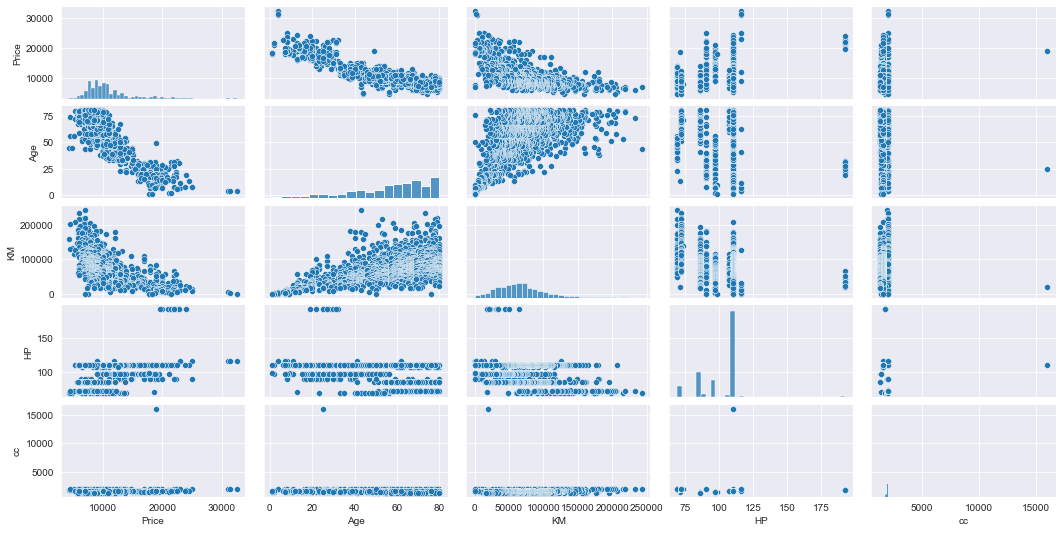

In [13]:
#Splitting the dataset into 2 portion as it is difficult to view in one pairplot
#Columns from Price till cc
sns.set_style(style='darkgrid')
c1= corolla.iloc[:,0:5] 
sns.pairplot(c1,height=1.5,aspect=2);

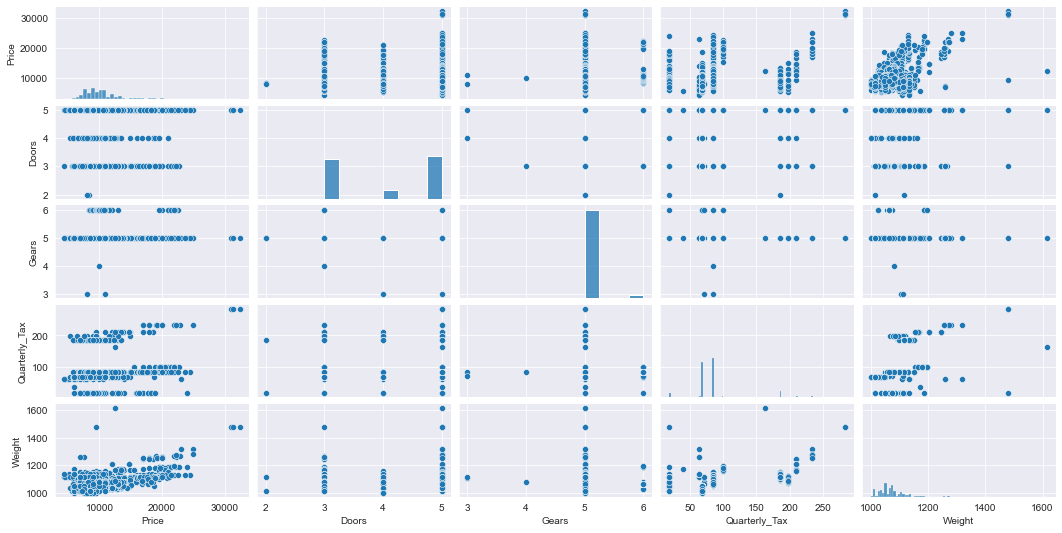

In [14]:
 #Columns Price + after cc till end
c2 = corolla.loc[:,['Price','Doors','Gears','Quarterly_Tax','Weight']] 
sns.pairplot(c2,height=1.5,aspect=2);

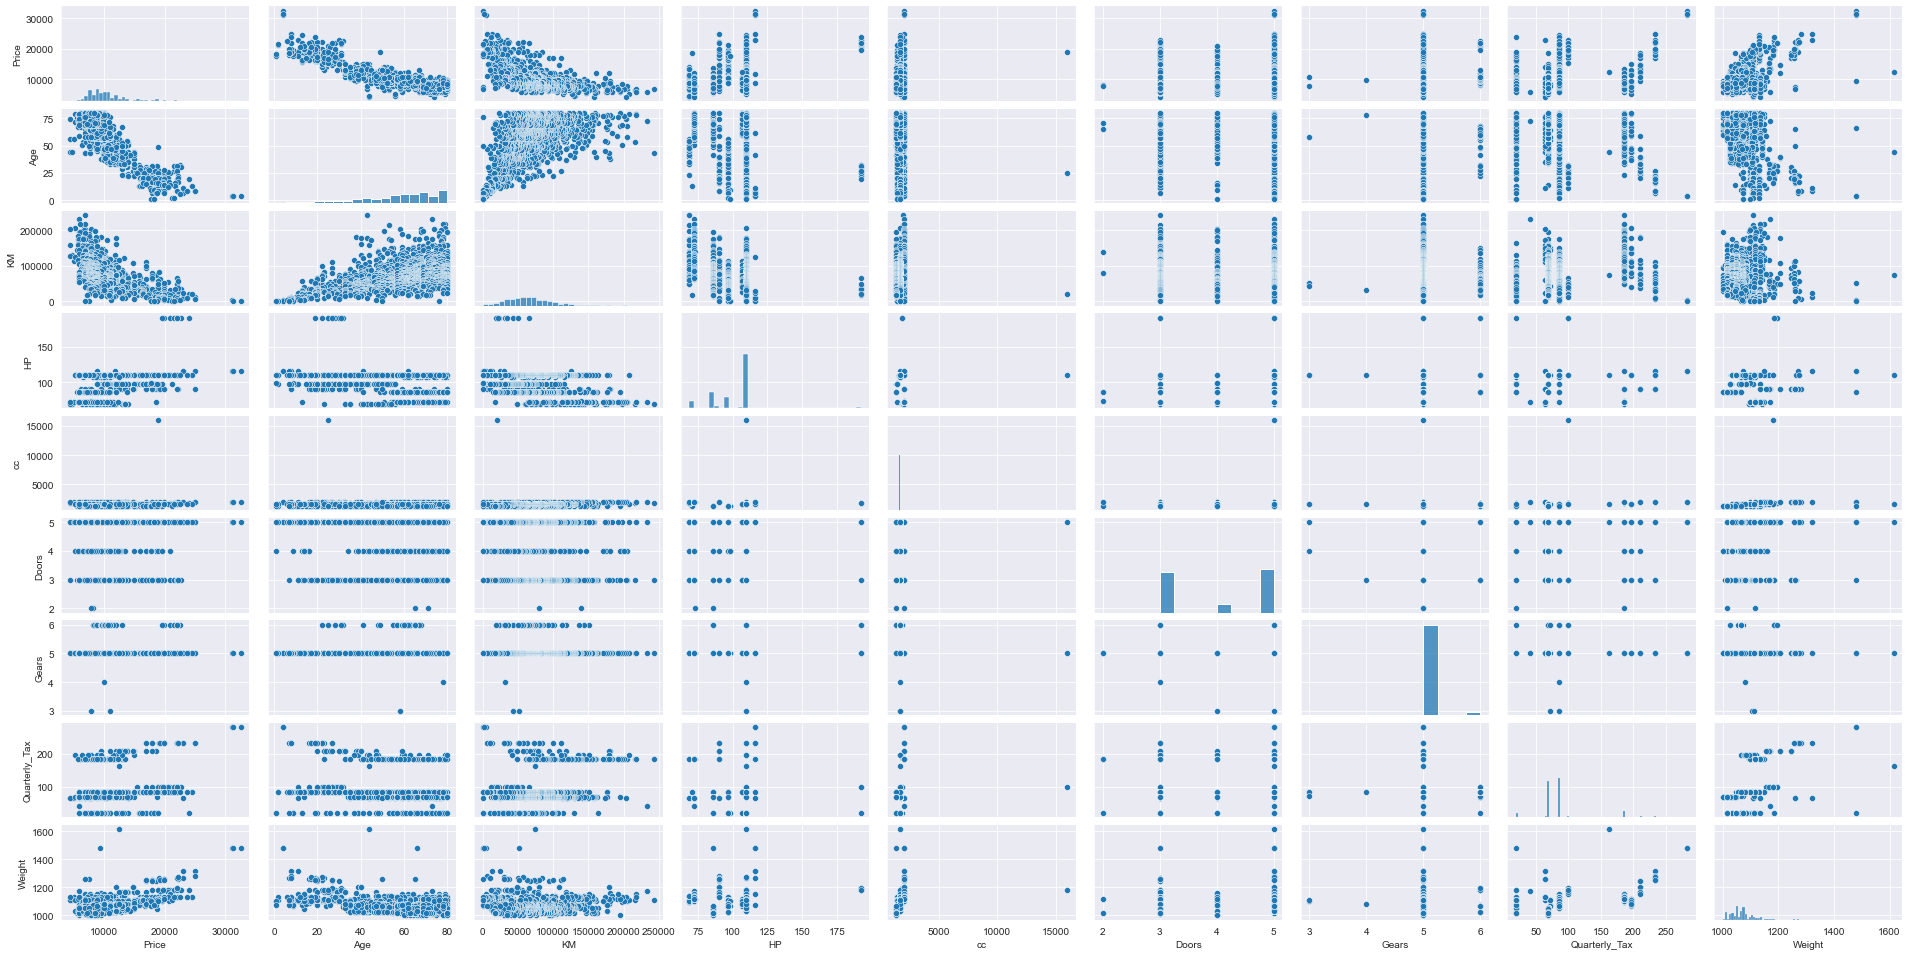

In [15]:
#Combined view
sns.pairplot(corolla,height=1.5,aspect=2);

### Preparing a Model

In [16]:
#built model
model=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=corolla).fit()

In [17]:
#Coefficients
model.params

Intercept       -5472.540368
Age              -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [18]:
#t and p-Values to find to non-significant variables
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.875273
Age             -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age              1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


Hypothesis Testing for variable contribution-                                                                 
**Assumptions & Test**                                                                                                         
assuming the significance level is 5% and confidence level 95%                                                           
∴ **α** = 5/100=0.05                                         
Null Hypothesis(**h0**)         -> **ß1=0**,i.e. Variable is **Dependent** and contributing.                                   
Alternate Hypothesis(**h1**) -> **ß1≠0**,i.e. Variable is **Independent** and not contributing.                                 

In [19]:
α=0.05
model.pvalues<α

Intercept         True
Age               True
KM                True
HP                True
cc               False
Doors            False
Gears             True
Quarterly_Tax     True
Weight            True
dtype: bool

Here the p values for cc and Doors are greater than alpha value i.e **p>α**                                                     
**Which means we fail to reject the Null Hypothesis(h0) and reject the alternate Hypothesis(h1)**                         
**∴ This proves that cc and Doors is zero and is Dependent.**                                         
**∴ we must drop cc and Doors to improve our model's and built a new model excluding these variables**

### Simple Linear Regression Models

In [20]:
# to check SLR on insignificant variable individually and together
ml_cc=smf.ols('Price~cc',data =corolla).fit()  
#t and p-Values
print(ml_cc.tvalues,'\n','\n',ml_cc.pvalues)  

Intercept    24.879592
cc            4.745039
dtype: float64 
 
 Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64


In [21]:
ml_door=smf.ols('Price~Doors',data =corolla).fit()  
#t and p-Values
print(ml_door.tvalues,'\n','\n',ml_door.pvalues)  

Intercept    19.421546
Doors         7.070520
dtype: float64 
 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [22]:
ml_cd=smf.ols('Price~cc+Doors',data =corolla).fit()  
#t and p-Values
print(ml_cd.tvalues,'\n','\n',ml_cd.pvalues)  

Intercept    12.786341
cc            4.268006
Doors         6.752236
dtype: float64 
 
 Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64


### Model Accuracy Metrics

In [23]:
#before drop accuracy
acc_b=(model.rsquared,model.rsquared_adj,model.aic)
acc_b

(0.8625200256947, 0.8617487495415146, 24750.407207346932)

In [24]:
#Dropping Door and cc Column
toyato=corolla.drop(["cc","Doors"], axis=1)
toyato.head()

,Price,Age,KM,HP,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,5,210,1165
1,13750,23,72937,90,5,210,1165
2,13950,24,41711,90,5,210,1165
3,14950,26,48000,90,5,210,1165
4,13750,30,38500,90,5,210,1170


In [25]:
#built new model without cc and doors
model1=smf.ols("Price~Age+KM+HP+Gears+Quarterly_Tax+Weight",data=toyato).fit()

In [26]:
#after drop accuracy
acc_a=(model1.rsquared,model1.rsquared_adj,model1.aic)
acc_a

(0.8623529474112607, 0.8617745984508038, 24748.150092216623)

In [27]:
acc_a[0]>acc_b[0],acc_a[1]>acc_b[1],acc_a[2]<acc_b[2]

(False, True, True)

we require higher r2 and adjusted r2 and less aic values,except r2 other values have been improved which means the second model is good compared to first.

### Collinearity

In [28]:
rsq_Age = smf.ols('Age~KM+HP+Gears+Quarterly_Tax+Weight',data=toyato).fit().rsquared  
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+Gears+Quarterly_Tax+Weight',data=toyato).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+Gears+Quarterly_Tax+Weight',data=toyato).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_Gears = smf.ols('Gears~Age+KM+HP+Quarterly_Tax+Weight',data=toyato).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_Tax = smf.ols('Quarterly_Tax~Age+KM+HP+Gears+Weight',data=toyato).fit().rsquared  
vif_Tax = 1/(1-rsq_Tax)

rsq_Weight = smf.ols('Weight ~Age+KM+HP+Gears+Quarterly_Tax',data=toyato).fit().rsquared  
vif_Weight  = 1/(1-rsq_Weight )

df = {'Variables':["Age","KM","HP","Gears","Quarterly_Tax","Weight"],'VIF':[vif_Age,vif_KM,vif_HP,vif_Gears,vif_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(df)  
Vif_frame

,Variables,VIF
0,Age,1.875943
1,KM,1.747015
2,HP,1.400087
3,Gears,1.059001
4,Quarterly_Tax,2.247695
5,Weight,2.269564


VIF below 10 is acceptable so there is no collinearity

### Model Validation Techniques
### Residual Analysis
#### 1.Test for Normality of Residuals (Q-Q Plot)

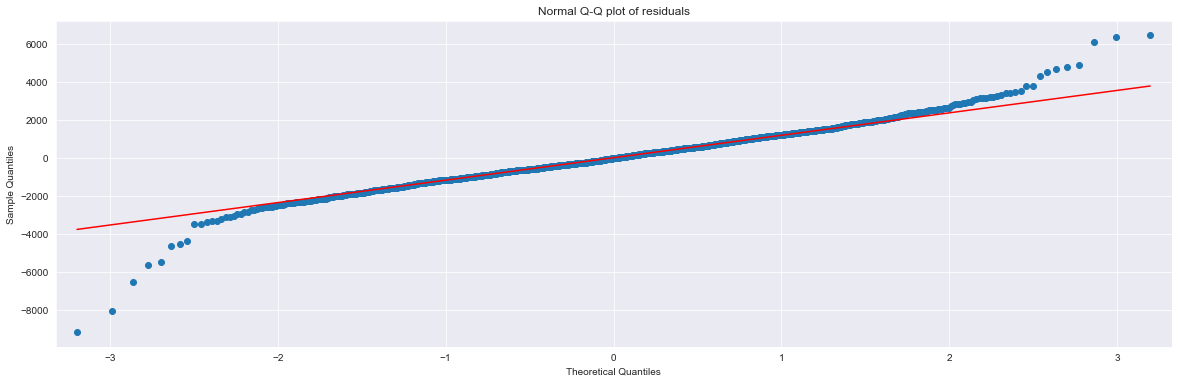

In [29]:
#to plot the errors on line ,line=q means to create a ols best line as per quartiles 
fig, ax = plt.subplots(figsize=(20,6))
qqplot=sm.qqplot(model1.resid,line='q',ax=ax) 
plt.title("Normal Q-Q plot of residuals")
plt.show();

In [30]:
#to check the outlayer value it will return observations
list(np.where(model1.resid>4000)),list(np.where(model1.resid<-4000))

([array([ 109,  110,  111,  124,  146,  170,  522, 1057], dtype=int64)],
 [array([190, 191, 220, 392, 401, 600, 653, 959], dtype=int64)])

#### 2.Residual Plot for Homoscedasticity(Fitted Vs Residuals) (Y^ Vs ei)

In [31]:
# to standardize the value for plotting by creating a std function
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

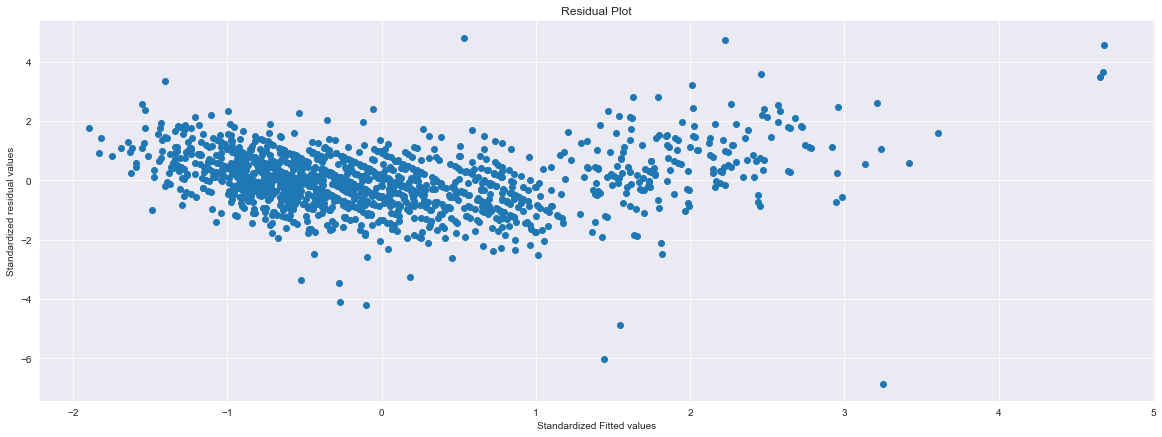

In [32]:
fig = plt.figure(figsize=(20,7))
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

NO patterns are visible

#### 3.Residual Vs Regressors (xi Vs ei)
 plotting for each variable

eval_env: 1


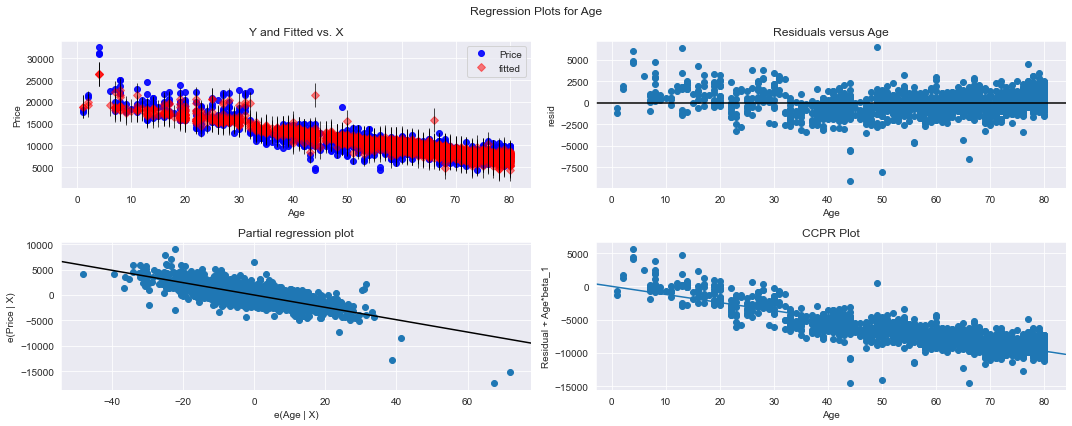

In [33]:
#for Age
fig_vol = plt.figure(figsize=(15,6))
fig = sm.graphics.plot_regress_exog(model1, "Age", fig=fig_vol)
plt.show();

eval_env: 1


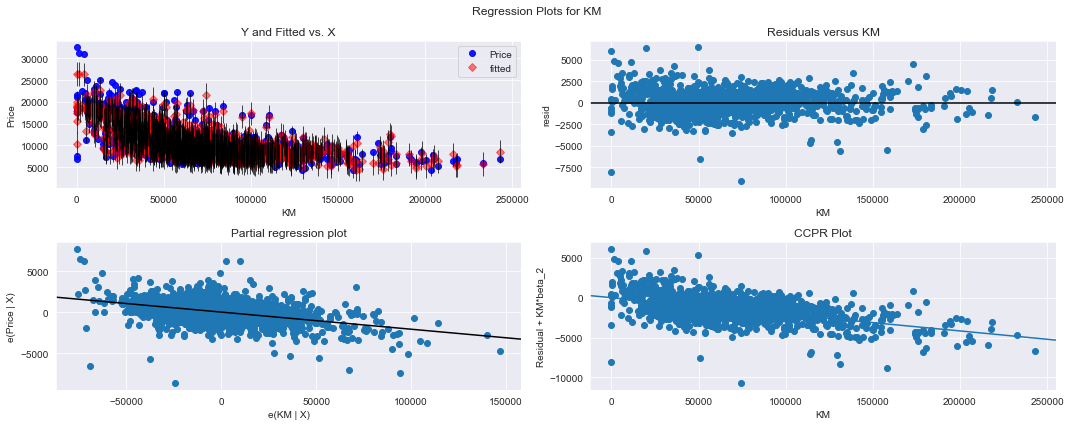

In [34]:
#for KM
fig_vol = plt.figure(figsize=(15,6))
fig = sm.graphics.plot_regress_exog(model1, "KM", fig=fig_vol)
plt.show();

eval_env: 1


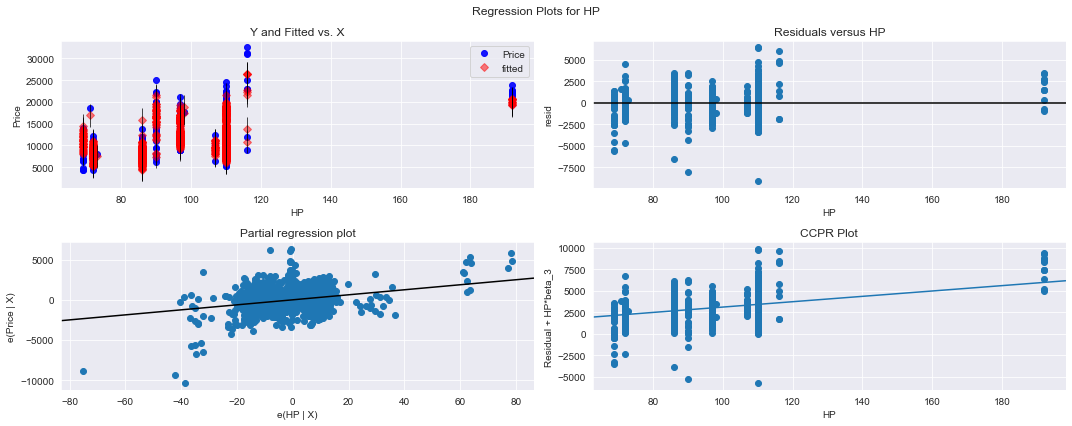

In [35]:
#for HP
fig_vol = plt.figure(figsize=(15,6))
fig = sm.graphics.plot_regress_exog(model1, "HP", fig=fig_vol)
plt.show();

eval_env: 1


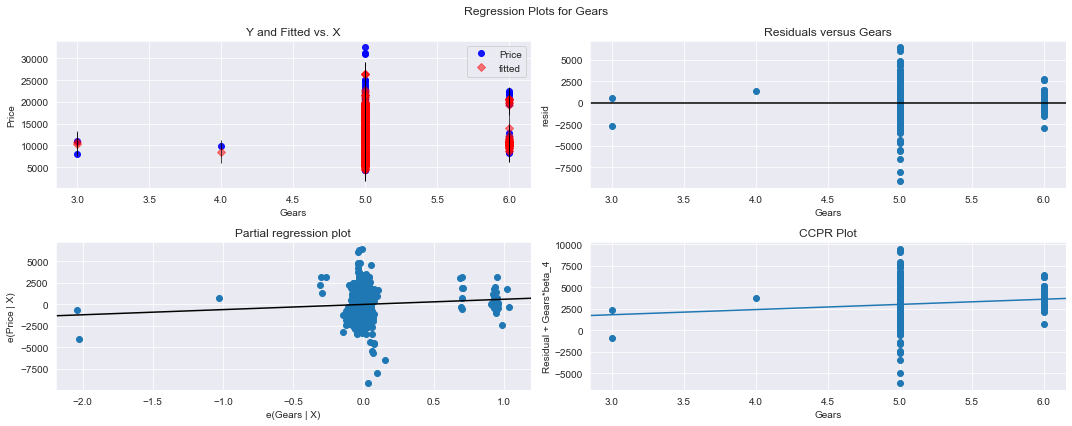

In [36]:
#for Gears
fig_vol = plt.figure(figsize=(15,6))
fig = sm.graphics.plot_regress_exog(model1, "Gears", fig=fig_vol)
plt.show();

eval_env: 1


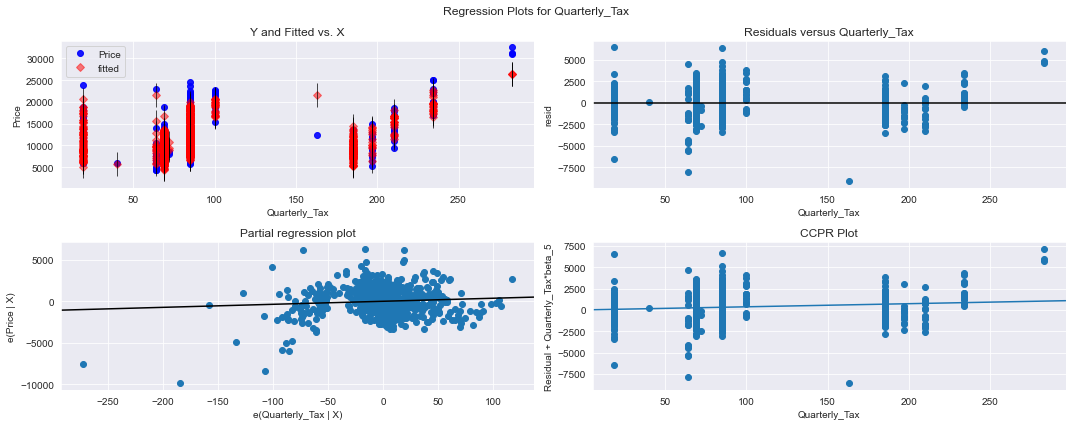

In [37]:
#for Quaterly Tax
fig_vol = plt.figure(figsize=(15,6))
fig = sm.graphics.plot_regress_exog(model1, "Quarterly_Tax", fig=fig_vol)
plt.show();

eval_env: 1


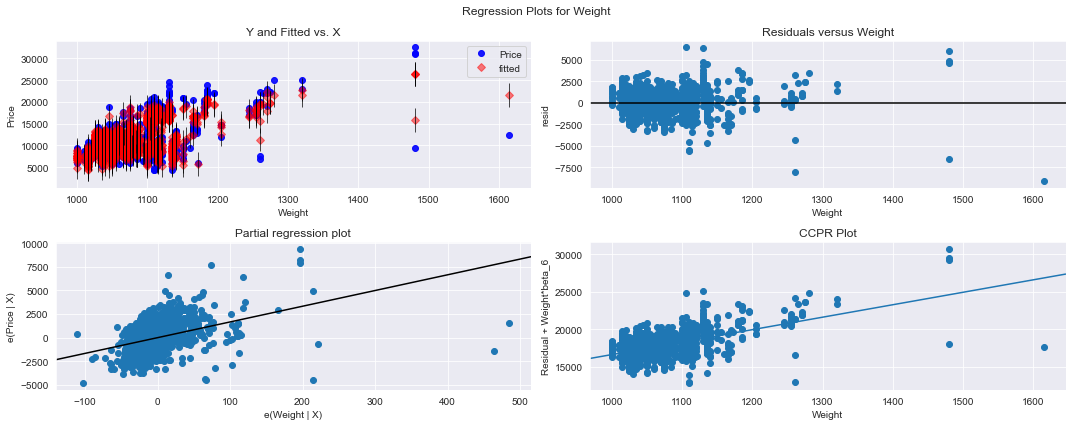

In [38]:
#for weight
fig_vol = plt.figure(figsize=(15,6))
fig = sm.graphics.plot_regress_exog(model1, "Weight", fig=fig_vol)
plt.show();

No patterns are visible so all variables are significant

### Model Deletion Diagnostics
Detecting outliers
#### 1.Cook's Distance

In [39]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

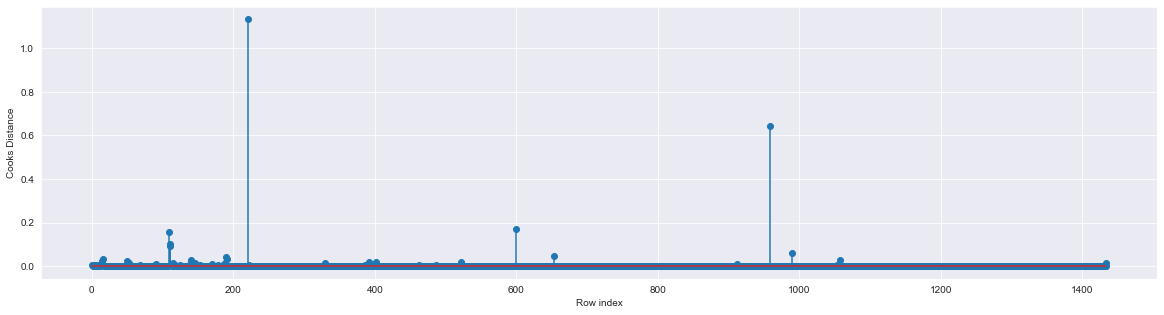

In [40]:
fig = plt.subplots(figsize=(20, 5))
plt.stem(np.arange(len(toyato)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
#index and value of influencer where c is max
(np.argmax(c),np.max(c))

(220, 1.1320670927763434)

Data point with Cook's Distance above 0.5 is highly influencing.

#### 2.High Influence Points-Hat Points

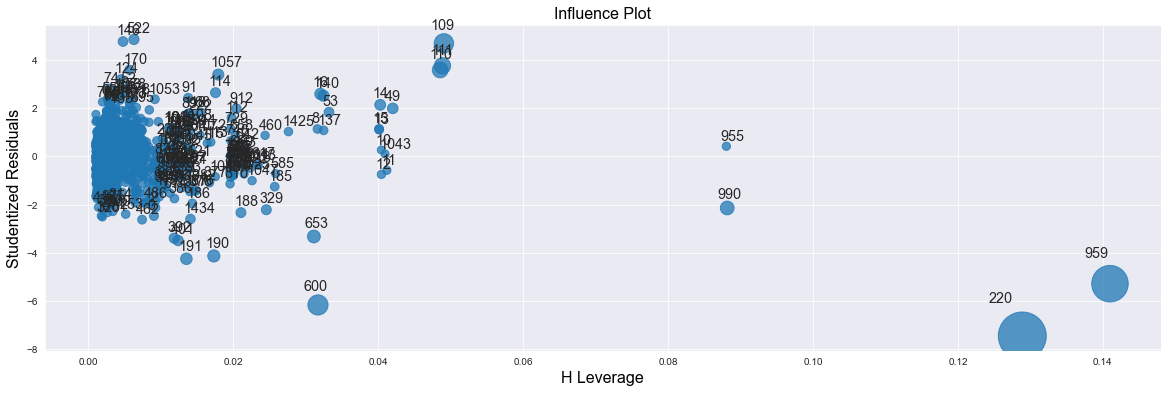

In [42]:
fig, ax = plt.subplots(figsize=(20,6))
influence_plot(model1,ax=ax)
plt.show();

In [43]:
#to set a leverge 
k = toyato.shape[1] # k-columns
n = toyato.shape[0]  # n-obs/rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.016724738675958188

Data point with leverage above 0.05 are influencing.                                             
From the above plot, it is evident that data point 220,959,990 and 955 are the influencers.

In [44]:
# to actually check the row values of outliers
toyato[toyato.index.isin([220,959,990,955])]

,Price,Age,KM,HP,Gears,Quarterly_Tax,Weight
220,12450,44,74172,110,5,163,1615
955,10950,58,51421,110,3,85,1105
959,9390,66,50806,86,5,19,1480
990,7950,58,43000,110,3,72,1114


In [45]:
#to compare the outlier value with the other values
toyato.head()

,Price,Age,KM,HP,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,5,210,1165
1,13750,23,72937,90,5,210,1165
2,13950,24,41711,90,5,210,1165
3,14950,26,48000,90,5,210,1165
4,13750,30,38500,90,5,210,1170


the values can be compared and seen that it varies a lot so we delete the outliers and improve our model by building one.

### Improving the model

In [46]:
#Deleting the outlier row[0] and reseting the cloumn index (reset_index())
toyato_new=toyato.drop(toyato.index[[955,959,990,220]],axis=0).reset_index()

In [47]:
#Drop the original index
toyato_new=toyato_new.drop(['index'],axis=1)

In [48]:
toyato_new.shape,toyato.shape

((1431, 7), (1435, 7))

In [49]:
toyato_new.head()

,Price,Age,KM,HP,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,5,210,1165
1,13750,23,72937,90,5,210,1165
2,13950,24,41711,90,5,210,1165
3,14950,26,48000,90,5,210,1165
4,13750,30,38500,90,5,210,1170


In [50]:
#built new model
model2=smf.ols("Price~Age+KM+HP+Gears+Quarterly_Tax+Weight",data=toyato_new).fit()

In [51]:
#model2 accrucy
acc_2=(model2.rsquared,model2.rsquared_adj,model2.aic)
acc_2

(0.8718827626455385, 0.8713429428252248, 24579.5713542538)

In [52]:
#to check if model is improved from before model
acc_2[0]>acc_a[0],acc_2[1]>acc_a[1],acc_2[2]<acc_a[2]

(True, True, True)

**This proves the model is improved.                                                                
Try cook's distance once again.**

In [53]:
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

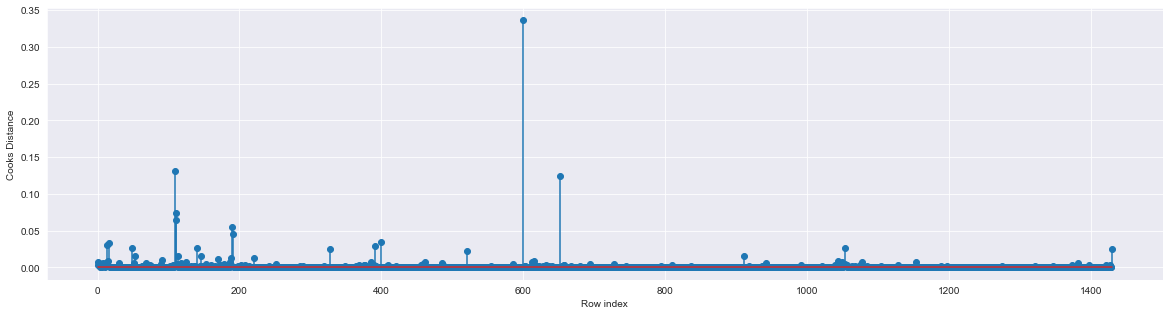

In [54]:
fig = plt.subplots(figsize=(20, 5))
plt.stem(np.arange(len(toyato_new)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
#index and value of influencer where c is max
(np.argmax(c),np.max(c))

(599, 0.3355177765528805)

In [56]:
# to actually check the row values of outliers
toyato_new[toyato_new.index.isin([599])]

,Price,Age,KM,HP,Gears,Quarterly_Tax,Weight
599,7500,50,1,90,5,64,1260


In [57]:
#Deleting the outlier row[0] and reseting the cloumn index (reset_index())
toyato_new1=toyato_new.drop(toyato_new.index[[599]],axis=0).reset_index()

In [58]:
#Drop the original index
toyato_new1=toyato_new1.drop(['index'],axis=1)

In [59]:
toyato_new1.shape,toyato_new.shape

((1430, 7), (1431, 7))

In [60]:
#built new model
model3=smf.ols("Price~Age+KM+HP+Gears+Quarterly_Tax+Weight",data=toyato_new1).fit()

In [61]:
#model3 accrucy
acc_3=(model3.rsquared,model3.rsquared_adj,model3.aic)
acc_3

(0.8766821071787205, 0.8761621441731494, 24508.01009291498)

In [62]:
#to check if model is improved from before model
acc_3[0]>acc_2[0],acc_3[1]>acc_2[1],acc_3[2]<acc_2[2]

(True, True, True)

**This again improves the model which means we can even improve more.**

In [63]:
model_influence = model3.get_influence()
(c, _) = model_influence.cooks_distance

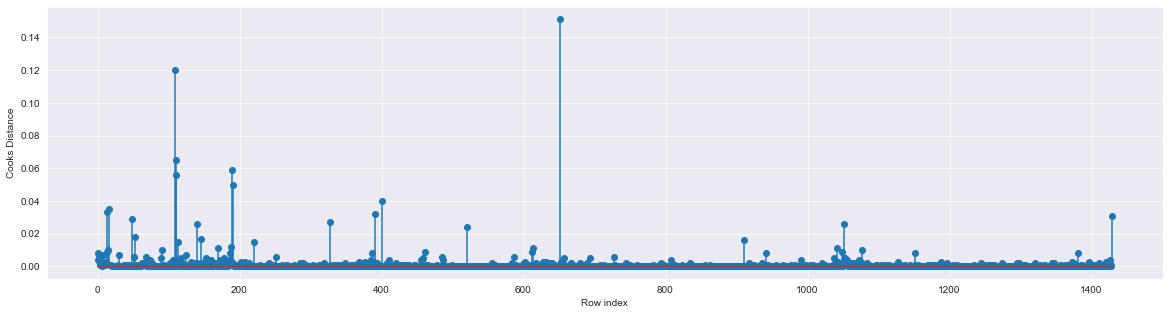

In [64]:
fig = plt.subplots(figsize=(20, 5))
plt.stem(np.arange(len(toyato_new1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [65]:
#index and value of influencer where c is max
(np.argmax(c),np.max(c))

(651, 0.1511348748947202)

In [66]:
# to actually check the row values of outliers
toyato_new1[toyato_new1.index.isin([651])]

,Price,Age,KM,HP,Gears,Quarterly_Tax,Weight
651,6950,65,114383,90,5,64,1260


In [67]:
#Deleting the outlier row[0] and reseting the cloumn index (reset_index())
toyato_new2=toyato_new1.drop(toyato_new1.index[[651]],axis=0).reset_index()

In [68]:
#Drop the original index
toyato_new2=toyato_new2.drop(['index'],axis=1)

In [69]:
toyato_new2.shape,toyato_new1.shape

((1429, 7), (1430, 7))

In [70]:
#built new model
model4=smf.ols("Price~Age+KM+HP+Gears+Quarterly_Tax+Weight",data=toyato_new2).fit()

In [71]:
#model3 accrucy
acc_4=(model4.rsquared,model4.rsquared_adj,model4.aic)
acc_4

(0.8786412530158246, 0.8781291907922627, 24467.903554883338)

In [72]:
#to check if model is improved from before model
acc_4[0]>acc_3[0],acc_4[1]>acc_3[1],acc_4[2]<acc_3[2]

(True, True, True)

**This improves our model and we continue the process till we reach its peak**

In [73]:
model_influence = model4.get_influence()
(c, _) = model_influence.cooks_distance

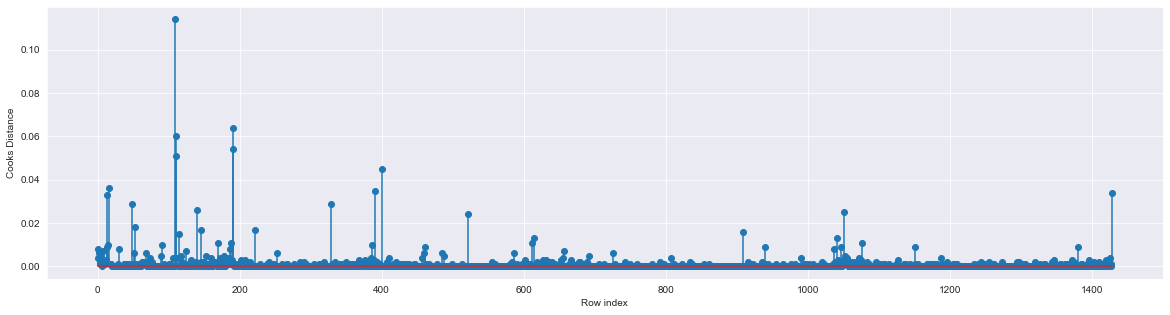

In [74]:
fig = plt.subplots(figsize=(20, 5))
plt.stem(np.arange(len(toyato_new2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [75]:
#index and value of influencer where c is max
(np.argmax(c),np.max(c))

(109, 0.1141795796449435)

In [76]:
# to actually check the row values of outliers
toyato_new2[toyato_new2.index.isin([109])]

,Price,Age,KM,HP,Gears,Quarterly_Tax,Weight
109,32500,4,1,116,5,283,1480


In [77]:
#Deleting the outlier row[0] and reseting the cloumn index (reset_index())
toyato_new3=toyato_new2.drop(toyato_new2.index[[109]],axis=0).reset_index()

In [78]:
#Drop the original index
toyato_new3=toyato_new3.drop(['index'],axis=1)

In [79]:
toyato_new3.shape,toyato_new2.shape

((1428, 7), (1429, 7))

In [80]:
#built new model
model5=smf.ols("Price~Age+KM+HP+Gears+Quarterly_Tax+Weight",data=toyato_new3).fit()

In [81]:
#model3 accrucy
acc_5=(model5.rsquared,model5.rsquared_adj,model5.aic)
acc_5

(0.8765704682872528, 0.8760493020731244, 24439.134444049563)

In [82]:
#to check if model is improved from before model
acc_5[0]>acc_4[0],acc_5[1]>acc_4[1],acc_5[2]<acc_4[2]

(False, False, True)

**At this point the accuracy of the model does not improves whereas it decreases.                               
So we stick to Model4 and work with future predictions.**

### Final Model

In [83]:
#final model
final_model=smf.ols("Price~Age+KM+HP+Gears+Quarterly_Tax+Weight",data=toyato_new2).fit()

In [84]:
#model accrucy
final_acc=(final_model.rsquared,final_model.rsquared_adj,final_model.aic)
final_acc

(0.8786412530158246, 0.8781291907922627, 24467.903554883338)

In [85]:
#to check if accuracy is same
final_acc[0]==acc_4[0],final_acc[1]==acc_4[1],final_acc[2]==acc_4[2]

(True, True, True)

### Prediction

In [86]:
toyato_new2.head()

,Price,Age,KM,HP,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,5,210,1165
1,13750,23,72937,90,5,210,1165
2,13950,24,41711,90,5,210,1165
3,14950,26,48000,90,5,210,1165
4,13750,30,38500,90,5,210,1170


In [87]:
# predicting by creating new df and dictionary for values
new_data=pd.DataFrame({"Age":20,"KM":45200,"HP":90,"Gears":4,"Quarterly_Tax":210,"Weight":1165},index=[1])
new_data

,Age,KM,HP,Gears,Quarterly_Tax,Weight
1,20,45200,90,4,210,1165


In [88]:
#Predicting
final_model.predict(new_data)

1    16479.924269
dtype: float64

In [89]:
final_model.params

Intercept       -13334.124282
Age               -113.248959
KM                  -0.021934
HP                  23.192472
Gears              534.727893
Quarterly_Tax       -3.188176
Weight              25.333668
dtype: float64

In [90]:
#to check the correct value manually
# y^= ß0+ß1x1+ß2x2+ß3x3+ß4x4+ß5x5+ß6x6
# y^= -13334.124282+(-113.248959*x1)+(-0.021934*x2)+(23.192472*x3)+( 534.727893*x4)+(-3.188176*x5)+(25.333668*x6)
pred= (-13334.124282)+(-113.248959*20)+(-0.021934*45200)+(23.192472*90)+( 534.727893*4)+(-3.188176*210)+(25.333668*1165)
pred

16479.920049999997

**The answers approximately match which shows the model can predict correctly.**